# Manual Coding Exploration & Visualisation


## Task Summary
This notebook follows a recurring pattern for analyzing different code categories and their subcodes:

1. Filter Data: Select rows where the "Code(s) Applied" column contains the main code of interest.
2. Define Subcodes: Create a list of specific subcodes to focus on within the filtered data.
3. Group and Count: Group the filtered data by "Subcode Applied" and count the occurrences of the specified subcodes.
4. Visualize Results: Create a bar chart to visualize the counts of the subcodes.
5. Summarize Findings: Provide a summary of the key findings and insights from the analysis and visualization.

Additionally, the notebook includes an analysis of code co-occurrence, visualised with a heat map, to identify which main codes appear together in the data.

In [218]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [219]:
# Read data
df = pd.read_csv("Manual Coding - Coding Table.csv")

In [220]:
# Display first five rows
display(df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
0,JM,This man's disability became a catalyst for in...,Section I,"""He volunteered for Bright Future Cornerstone,...",Inclusive Digital Ecosystem,Private Sector Role
1,JM,"""",NaN,"""Volunteering opened doors for me to mentor yo...",Resilience & Coping Strategies,Peer Networks & Mentorship
2,JM,"""",NaN,"""Through entrepreneurship and ICT, I empower o...",Resilience & Coping Strategies,NaN
3,JM,"""",NaN,"""Today, Sibomana has a smart phone as his cons...",Digital Technology & Design,Inclusive Tech Tools
4,JM,"""",NaN,"""I reached every office on the campus seeking ...",Access Barriers,Information Gap


In [221]:
# Display columns
df.columns

Index(['Coder Initials', 'Dataset ID', 'Page & Section/Paragraph',
       'Text Excerpt', 'Code(s) Applied', 'Subcode Applied'],
      dtype='object')

## Main Codes

### Group and count



In [222]:
# Define specific main codes
specific_main_codes = [
    "Access Barriers",
    "Digital Skills Gap",
    "Digital Technology & Design",
    "Social & Systemic Exclusion",
    "Inclusive Digital Ecosystem",
    "Resilience & Coping Strategies",
]

# Split and explode codes
df_codes_exploded = df.assign(
    **{"Code(s) Applied": df["Code(s) Applied"].str.split(";")}
).explode("Code(s) Applied")

# Trim whitespace
df_codes_exploded["Code(s) Applied"] = df_codes_exploded["Code(s) Applied"].str.strip()

# Filter and count specific main codes
main_code_counts = df_codes_exploded[
    df_codes_exploded["Code(s) Applied"].isin(specific_main_codes)
]["Code(s) Applied"].value_counts()

# Display counts
display(main_code_counts)

,count
Code(s) Applied,
Access Barriers,68
Digital Technology & Design,48
Social & Systemic Exclusion,41
Inclusive Digital Ecosystem,31
Digital Skills Gap,14
Resilience & Coping Strategies,10


### Visualise main codes

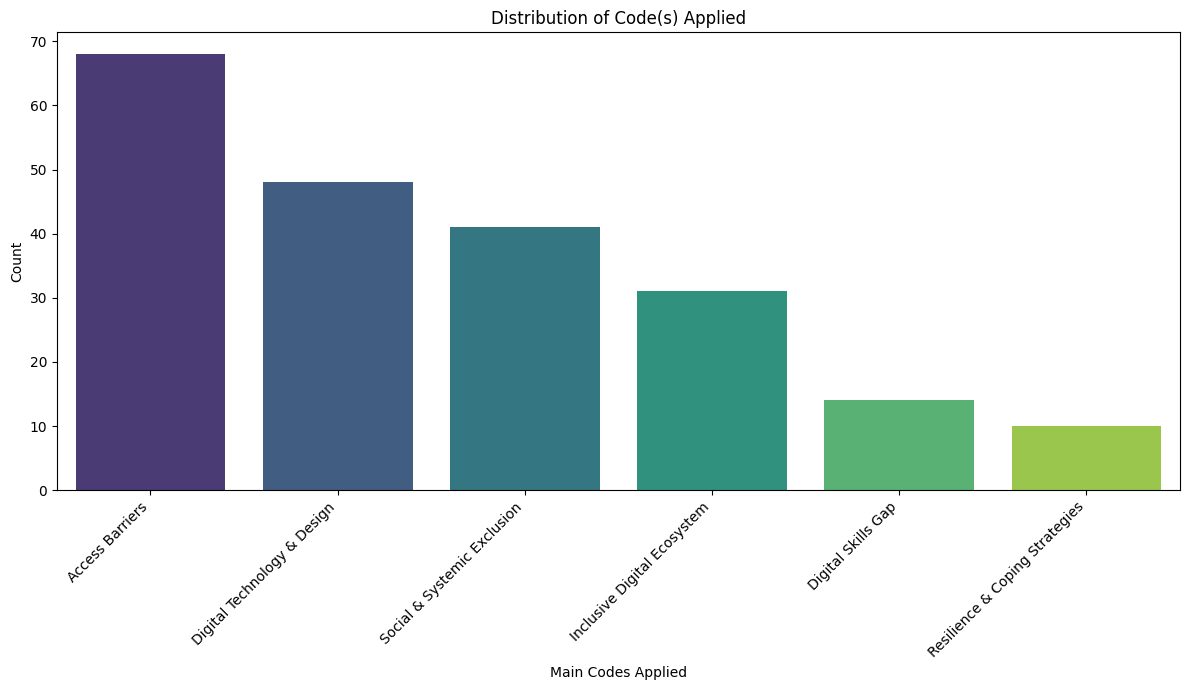

In [223]:
# Create bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x=main_code_counts.index,
    y=main_code_counts.values,
    palette="viridis",
    hue=main_code_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Main Codes Applied")
plt.ylabel("Count")
plt.title("Distribution of Code(s) Applied")
plt.tight_layout()

# Save to a file
plt.savefig("main_codes_distribution.png", bbox_inches="tight")

plt.show()

### Summary: Code(s) Applied

* The counts for the specified codes were: Access Barriers (68), Digital Technology & Design (48), Social & Systemic Exclusion (41), Inclusive Digital Ecosystem (31), Digital Skills Gap (14), and Resilience & Coping Strategies (10).

* The visualization clearly highlights that 'Access Barriers' is the most commonly applied code, suggesting this is a significant theme in the data.




## Access Barriers


### Filter data

In [224]:
# Filter for 'Access Barriers'
access_barriers_df = df[
    df["Code(s) Applied"].str.contains("Access Barriers", na=False)
].copy()

In [225]:
# Display filtered head
access_barriers_df.head()

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
4,JM,"""",NaN,"""I reached every office on the campus seeking ...",Access Barriers,Information Gap
5,JM,"""",NaN,"""According to the World Health Organisation (W...",Access Barriers,Availability
6,JM,"""",NaN,"""According to Sibomana, many young Africans ar...",Access Barriers,Late Exposure
7,JM,"""",NaN,"""Without early access to AT, African youth wit...",Access Barriers,Late Exposure
8,JM,"""",NaN,"""Young African women are falling behind when i...",Access Barriers,Gender Gap


### Define subcodes


In [226]:
# Define access subcodes
access_subcodes = [
    "Affordability",
    "Connectivity",
    "Device Access",
    "Service Availability",
    "Information Gap",
    "Gender Gap",
    "Physical Inaccessibility",
    "Language",
    "Intersectionality",
    "Late Exposure",
    "Electricity",
]

# Display list
display(access_subcodes)

['Affordability',
 'Connectivity',
 'Device Access',
 'Service Availability',
 'Information Gap',
 'Gender Gap',
 'Physical Inaccessibility',
 'Language',
 'Intersectionality',
 'Late Exposure',
 'Electricity']

### Group and count

In [227]:
# Split subcodes and explode rows
access_barriers_df_exploded = access_barriers_df.assign(
    **{"Subcode Applied": access_barriers_df["Subcode Applied"].str.split(";")}
).explode("Subcode Applied")

# Trim whitespace from subcodes
access_barriers_df_exploded["Subcode Applied"] = access_barriers_df_exploded[
    "Subcode Applied"
].str.strip()

# Count occurrences of specific subcodes
subcode_counts = access_barriers_df_exploded[
    access_barriers_df_exploded["Subcode Applied"].isin(access_subcodes)
]["Subcode Applied"].value_counts()

display(subcode_counts)

,count
Subcode Applied,
Connectivity,18
Device Access,17
Affordability,12
Information Gap,10
Gender Gap,6
Language,5
Service Availability,4
Intersectionality,3
Late Exposure,2


### Visualise access barriers


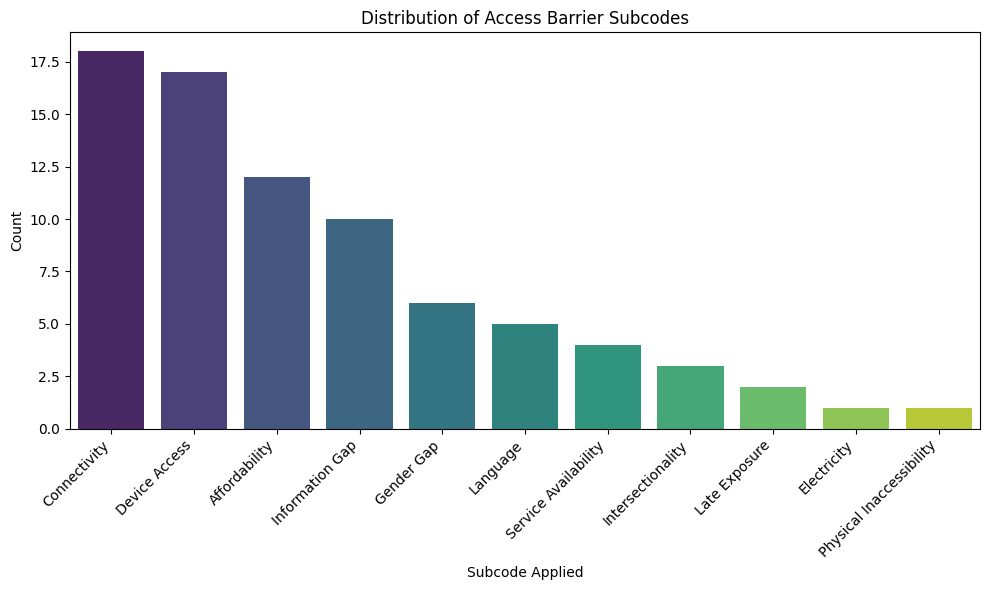

In [228]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=subcode_counts.index,
    y=subcode_counts.values,
    palette="viridis",
    hue=subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Access Barrier Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig("access_barriers_subcodes_distribution.png", bbox_inches="tight")

plt.show()

### Summary: Access Barriers

* The analysis of 'Access Barriers' subcodes showed 'Connectivity' as the most frequent (18 counts), followed by 'Device Access' (17 counts), 'Affordability' (12 counts) and 'Information Gap' (10 counts).

* This indicates that issues related to connectivity and device access are the most commonly discussed aspects within this category, although other barriers like affordability and information gaps are also significant.

* The inclusion of 'Gender Gap' and 'Intersectionality' highlights how access barriers can be compounded by other factors.

## Digital Skills Gap

### Filter data


In [229]:
# Filter for 'Digital Skills Gap'
digital_skills_df = df[
    df["Code(s) Applied"].str.contains("Digital Skills Gap", na=False)
].copy()

# Display filtered head
display(digital_skills_df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
48,JM,"""",NaN,“Many Africans do not have access to the educa...,Digital Skills Gap,Digital Literacy; Training Needs
49,JM,"""",NaN,“Disabled people face additional educational a...,Digital Skills Gap,Digital Literacy; Training Needs
54,JM,"""",NaN,“Large technology companies… These are accesse...,Access Barriers; Digital Skills Gap,Digital Literacy
61,JM,"""",NaN,“Lack of accessibility and accommodation for d...,Access Barriers; Digital Skills Gap,Physical Inaccessibility; Training Needs; Digi...
69,JM,"""",Pg 18,“Disabled people are even more likely than oth...,Digital Skills Gap,Training Needs


### Define subcodes


In [230]:
# Define digital skills subcodes
digital_skills_subcodes = [
    "Digital Literacy",
    "Business-Specific Skills",
    "Training Needs",
]

# Display list
display(digital_skills_subcodes)

['Digital Literacy', 'Business-Specific Skills', 'Training Needs']

### Group and count



In [231]:
# Split and explode subcodes
digital_skills_df_exploded = digital_skills_df.assign(
    **{"Subcode Applied": digital_skills_df["Subcode Applied"].str.split(";")}
).explode("Subcode Applied")

# Trim whitespace
digital_skills_df_exploded["Subcode Applied"] = digital_skills_df_exploded[
    "Subcode Applied"
].str.strip()

# Filter and count specific subcodes
digital_skills_subcode_counts = digital_skills_df_exploded[
    digital_skills_df_exploded["Subcode Applied"].isin(digital_skills_subcodes)
]["Subcode Applied"].value_counts()

# Display counts
display(digital_skills_subcode_counts)

,count
Subcode Applied,
Digital Literacy,9
Training Needs,7


### Visualise digital skills gap



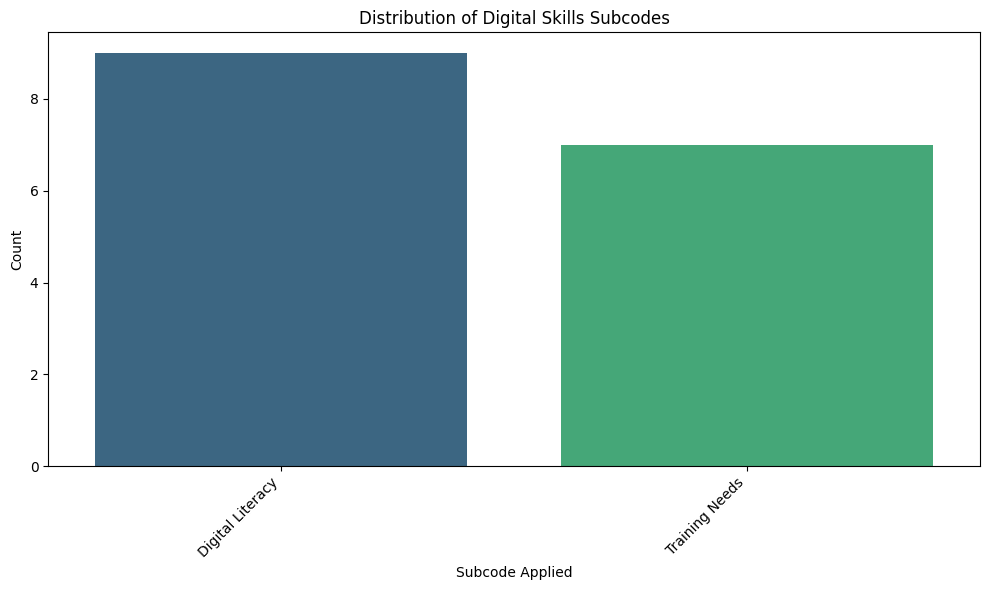

In [232]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=digital_skills_subcode_counts.index,
    y=digital_skills_subcode_counts.values,
    palette="viridis",
    hue=digital_skills_subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Digital Skills Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig("digital_skills_subcodes_distribution.png", bbox_inches="tight")

plt.show()

### Summary: Digital Skills Gap

* Within the 'Digital Skills Gap' category, the subcodes 'Digital Literacy' appeared 10 times and 'Training Needs' appeared 7 times.

* The specified subcode 'Business-Specific Skills' did not appear in the dataset under the 'Digital Skills Gap' category.

* The primary focus within 'Digital Skills Gap' seems to be on 'Digital Literacy' and identifying 'Training Needs'. Further investigation could explore the specific types of digital literacy gaps and training required.

* Since 'Business-Specific Skills' did not appear, it might indicate that this area is either not reported under 'Digital Skills Gap' or is not a significant factor in the current dataset, which could be a point for further data collection or analysis.


## Digital Technology & Design

### Filter data


In [233]:
# Filter for 'Digital Technology & Design'
digital_tech_design_df = df[
    df["Code(s) Applied"].str.contains("Digital Technology & Design", na=False)
].copy()

# Display filtered head
display(digital_tech_design_df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
3,JM,"""",NaN,"""Today, Sibomana has a smart phone as his cons...",Digital Technology & Design,Inclusive Tech Tools
9,JM,"""",NaN,"""While visiting a resource room… he discovered...",Digital Technology & Design,Inclusive Tech Tools
21,JM,Usability testing and digital accessibility co...,Pg 3,"""PigiaMe earned higher usability ratings than ...",Digital Technology & Design,Interface Barriers
22,JM,"""",Pg 3,"""The digital accessibility assessment found th...",Digital Technology & Design,Interface Barriers; Non-Inclusive Tools
23,JM,"""",Pg 3,"""Icons could not be read by talkback software,...",Digital Technology & Design,Interface Barriers


### Define subcodes

In [234]:
# Define digital tech & design subcodes
digital_tech_design_subcodes = [
    "Interface Barriers",
    "AI Bias / Algorithmic Exclusion",
    "Non-Inclusive Tools",
    "Inclusive Tech Tools",
]

# Display list
display(digital_tech_design_subcodes)

['Interface Barriers',
 'AI Bias / Algorithmic Exclusion',
 'Non-Inclusive Tools',
 'Inclusive Tech Tools']

### Group and count subcodes


In [235]:
# Split and explode subcodes
digital_tech_design_df_exploded = digital_tech_design_df.assign(
    **{"Subcode Applied": digital_tech_design_df["Subcode Applied"].str.split(";")}
).explode("Subcode Applied")

# Trim whitespace
digital_tech_design_df_exploded["Subcode Applied"] = digital_tech_design_df_exploded[
    "Subcode Applied"
].str.strip()

# Filter and count specific subcodes
digital_tech_design_subcode_counts = digital_tech_design_df_exploded[
    digital_tech_design_df_exploded["Subcode Applied"].isin(
        digital_tech_design_subcodes
    )
]["Subcode Applied"].value_counts()

# Display counts
display(digital_tech_design_subcode_counts)

,count
Subcode Applied,
Interface Barriers,23
Inclusive Tech Tools,18
Non-Inclusive Tools,10
AI Bias / Algorithmic Exclusion,2


### Visualize digital technology & design

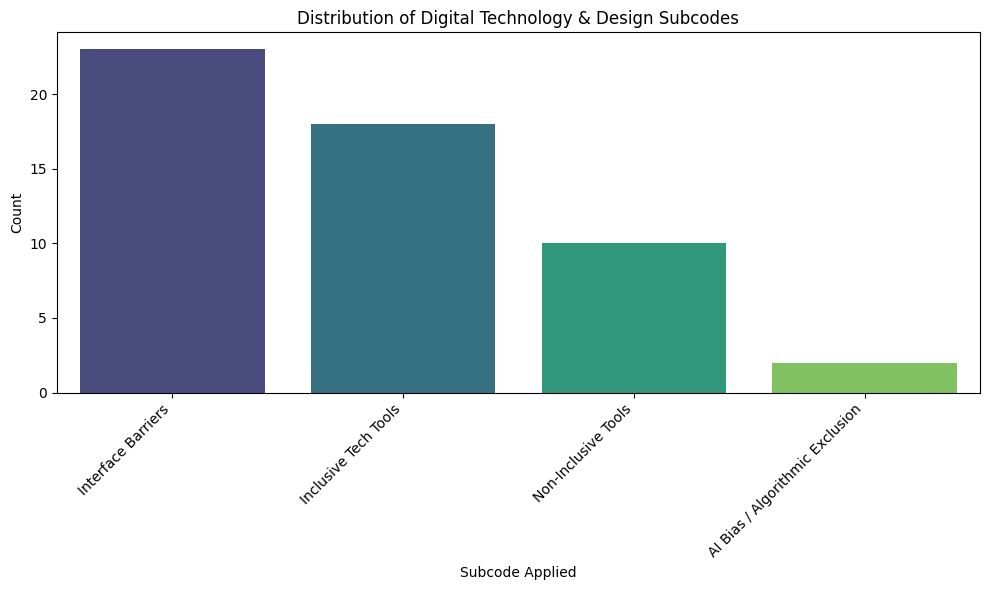

In [236]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=digital_tech_design_subcode_counts.index,
    y=digital_tech_design_subcode_counts.values,
    palette="viridis",
    hue=digital_tech_design_subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Digital Technology & Design Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig("digital_tech_design_subcodes_distribution.png", bbox_inches="tight")

plt.show()

### Summary: Digital Technology & Design

* The analysis of 'Digital Technology & Design' subcodes showed 'Interface Barriers' as the most frequent (23 counts), followed by 'Inclusive Tech Tools' (18 counts), 'Non-Inclusive Tools' (10 counts), and 'AI Bias / Algorithmic Exclusion' (2 counts).

* This indicates that issues related to user interfaces are the most commonly discussed aspect within this category, although there are also significant mentions of both inclusive and non-inclusive technological tools.

* The lower count for 'AI Bias / Algorithmic Exclusion' might suggest it is a less prevalent theme in this dataset compared to interface and tool-related issues.

## Social & Systemic Exclusion

### Filter data


In [237]:
# Filter for 'Social & Systemic Exclusion'
social_systemic_df = df[
    df["Code(s) Applied"].str.contains("Social & Systemic Exclusion", na=False)
].copy()

# Display filtered head
display(social_systemic_df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
51,JM,"""",Pg 4,“Good governance can mediate conflicting inter...,Social & Systemic Exclusion,Policy Neglect
52,JM,"""",NaN,“Implementation of existing digital accessibil...,Social & Systemic Exclusion,Policy Neglect
53,JM,"""",Pg 9,“Several innovative ATs have been developed… b...,Social & Systemic Exclusion,Representation Gaps
57,JM,"""",NaN,"“There is an intersection between poverty, equ...",Access Barriers; Social & Systemic Exclusion,Affordability; Intersectionality
62,JM,"""",NaN,“A range of questions and challenges were pose...,Social & Systemic Exclusion,Data Invisibility


### Define subcodes



In [238]:
# Define social & systemic exclusion subcodes
social_systemic_subcodes = [
    "Representation Gap",
    "Stigma",
    "Policy Neglect",
    "Data Invisibility",
]

# Display list
display(social_systemic_subcodes)

['Representation Gap', 'Stigma', 'Policy Neglect', 'Data Invisibility']

### Group and Count Subcodes

In [239]:
# Split and explode subcodes
social_systemic_df_exploded = social_systemic_df.assign(
    **{"Subcode Applied": social_systemic_df["Subcode Applied"].str.split(";")}
).explode("Subcode Applied")

# Trim whitespace
social_systemic_df_exploded["Subcode Applied"] = social_systemic_df_exploded[
    "Subcode Applied"
].str.strip()

# Filter and count specific subcodes and plot
social_systemic_subcode_counts = social_systemic_df_exploded[
    social_systemic_df_exploded["Subcode Applied"].isin(social_systemic_subcodes)
]["Subcode Applied"].value_counts()

# Display counts
display(social_systemic_subcode_counts)

,count
Subcode Applied,
Policy Neglect,14
Data Invisibility,8
Representation Gap,6
Stigma,4


### Visualise social & systemic exclusion

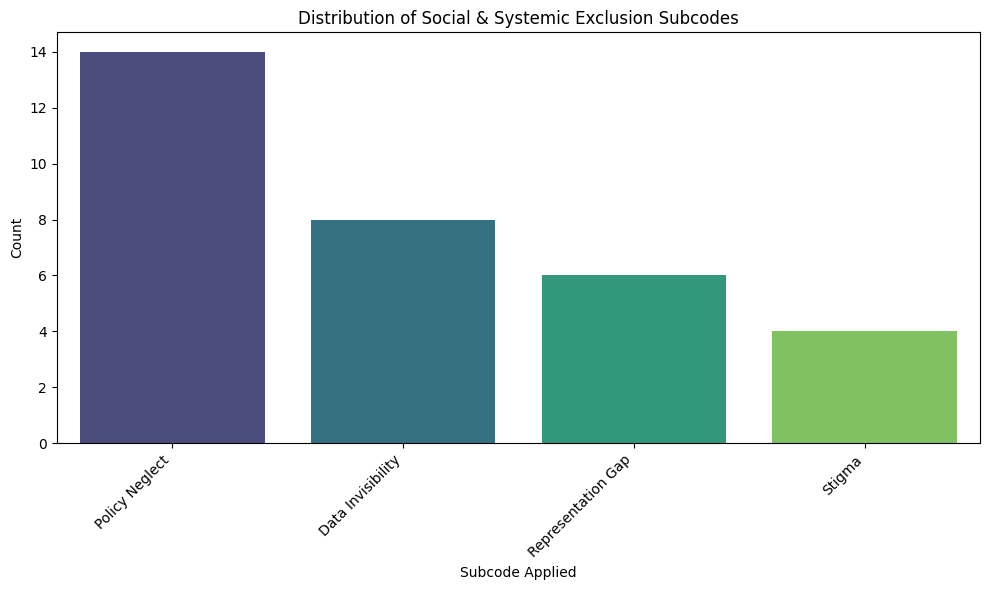

In [240]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=social_systemic_subcode_counts.index,
    y=social_systemic_subcode_counts.values,
    palette="viridis",
    hue=social_systemic_subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Social & Systemic Exclusion Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig("social_systemic_subcodes_distribution_alt.png", bbox_inches="tight")

plt.show()

### Summary: Social & Systemic Exclusion

* The most frequent subcode within 'Social & Systemic Exclusion' is 'Policy Neglect' (14 counts), followed by 'Data Invisibility' (8 counts), 'Representation Gap' (6 counts), and 'Stigma' (4 counts).

* Investigate the content associated with 'Policy Neglect' and 'Data Invisibility' to understand the specific issues driving these higher counts within 'Social & Systemic Exclusion'.


## Inclusive Digital Ecosystem

### Filter data

In [241]:
# Filter for 'Inclusive Digital Ecosystem'
inclusive_digital_ecosystem_df = df[
    df["Code(s) Applied"].str.contains("Inclusive Digital Ecosystem", na=False)
].copy()

# Display filtered head
display(inclusive_digital_ecosystem_df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
0,JM,This man's disability became a catalyst for in...,Section I,"""He volunteered for Bright Future Cornerstone,...",Inclusive Digital Ecosystem,Private Sector Role
11,JM,"""",Section II,"""Sibomana started mentoring visually impaired ...",Inclusive Digital Ecosystem; Resilience & Copi...,Private Sector Role; Peer Networks
16,JM,"""",NaN,"""He has since co-founded a consultancy firm th...",Inclusive Digital Ecosystem; Resilience & Copi...,Private Sector Role; Local Solutions
17,JM,"""",NaN,"""His expertise also led him to join the Privat...",Inclusive Digital Ecosystem,Private Sector Role
70,M,Innovating Inclusion: Youth with Disabilities ...,"Main Body, Para 1",“Young entrepreneurs with disabilities are tra...,Inclusive Digital Ecosystem; Digital Technolog...,Inclusive Tech Tools


### Define subcodes

In [242]:
# Define inclusive digital ecosystem subcodes
inclusive_digital_ecosystem_subcodes = [
    "Private Sector Role",
    "Policy Environment",
    "Platform Economy",
]

# Display list
display(inclusive_digital_ecosystem_subcodes)

['Private Sector Role', 'Policy Environment', 'Platform Economy']

### Group and count subcodes

In [243]:
# Split and explode subcodes
inclusive_digital_ecosystem_df_exploded = inclusive_digital_ecosystem_df.assign(
    **{
        "Subcode Applied": inclusive_digital_ecosystem_df["Subcode Applied"].str.split(
            ";"
        )
    }
).explode("Subcode Applied")

# Trim whitespace
inclusive_digital_ecosystem_df_exploded["Subcode Applied"] = (
    inclusive_digital_ecosystem_df_exploded["Subcode Applied"].str.strip()
)

# Filter and count specific subcodes
inclusive_digital_ecosystem_subcode_counts = inclusive_digital_ecosystem_df_exploded[
    inclusive_digital_ecosystem_df_exploded["Subcode Applied"].isin(
        inclusive_digital_ecosystem_subcodes
    )
]["Subcode Applied"].value_counts()

# Display counts
display(inclusive_digital_ecosystem_subcode_counts)

,count
Subcode Applied,
Private Sector Role,16
Policy Environment,11
Platform Economy,1


### Visualize inclusive digital ecosystem

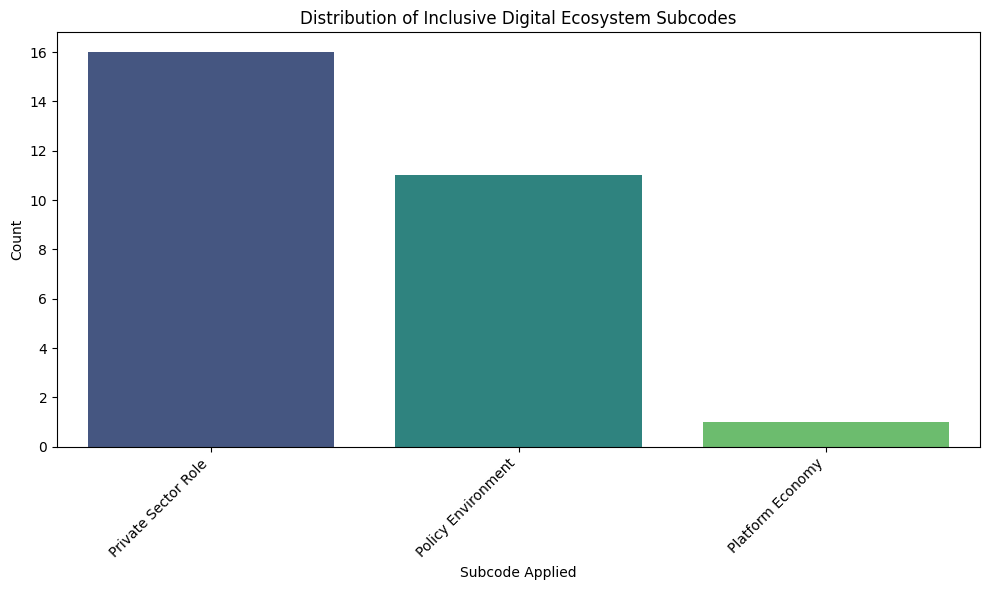

In [244]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=inclusive_digital_ecosystem_subcode_counts.index,
    y=inclusive_digital_ecosystem_subcode_counts.values,
    palette="viridis",
    hue=inclusive_digital_ecosystem_subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Inclusive Digital Ecosystem Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig(
    "inclusive_digital_ecosystem_subcodes_distribution.png", bbox_inches="tight"
)

plt.show()

### Summary: Inclusive Digital Ecosystem

- Analysis of the 'Inclusive Digital Ecosystem' revealed 'Private Sector Role' (16 counts) and 'Policy Environment' (11 counts) as the most frequent subcodes. 'Platform Economy' appeared only once.

- Further investigation into the specific mentions of these subcodes could provide more detailed insights.

## Resilience & Coping Strategies

### Filter data


In [245]:
# Filter for 'Resilience & Coping Strategies'
resilience_df = df[
    df["Code(s) Applied"].str.contains("Resilience & Coping Strategies", na=False)
].copy()

# Display filtered head
display(resilience_df.head())

,Coder Initials,Dataset ID,Page & Section/Paragraph,Text Excerpt,Code(s) Applied,Subcode Applied
1,JM,"""",NaN,"""Volunteering opened doors for me to mentor yo...",Resilience & Coping Strategies,Peer Networks & Mentorship
2,JM,"""",NaN,"""Through entrepreneurship and ICT, I empower o...",Resilience & Coping Strategies,NaN
11,JM,"""",Section II,"""Sibomana started mentoring visually impaired ...",Inclusive Digital Ecosystem; Resilience & Copi...,Private Sector Role; Peer Networks
12,JM,"""",NaN,"""Sibomana introduced her to assistive devices ...",Resilience & Coping Strategies,Peer Networks
13,JM,"""",NaN,"""He strengthened my ability to accomplish work...",Resilience & Coping Strategies,Peer Networks


### Define subcodes


In [246]:
# Define resilience subcodes
resilience_subcodes = ["Creative Adaptation", "Peer Networks", "Local Solutions"]

# Display list
display(resilience_subcodes)

['Creative Adaptation', 'Peer Networks', 'Local Solutions']

### Group and count subcodes


In [247]:
# Split and explode subcodes
resilience_df_exploded = resilience_df.assign(
    **{"Subcode Applied": resilience_df["Subcode Applied"].str.split(";")}
).explode("Subcode Applied")

# Trim whitespace
resilience_df_exploded["Subcode Applied"] = resilience_df_exploded[
    "Subcode Applied"
].str.strip()

# Filter and count specific subcodes
resilience_subcode_counts = resilience_df_exploded[
    resilience_df_exploded["Subcode Applied"].isin(resilience_subcodes)
]["Subcode Applied"].value_counts()

# Display counts
display(resilience_subcode_counts)

,count
Subcode Applied,
Peer Networks,5
Local Solutions,2


### Visualize resilience & coping strategies


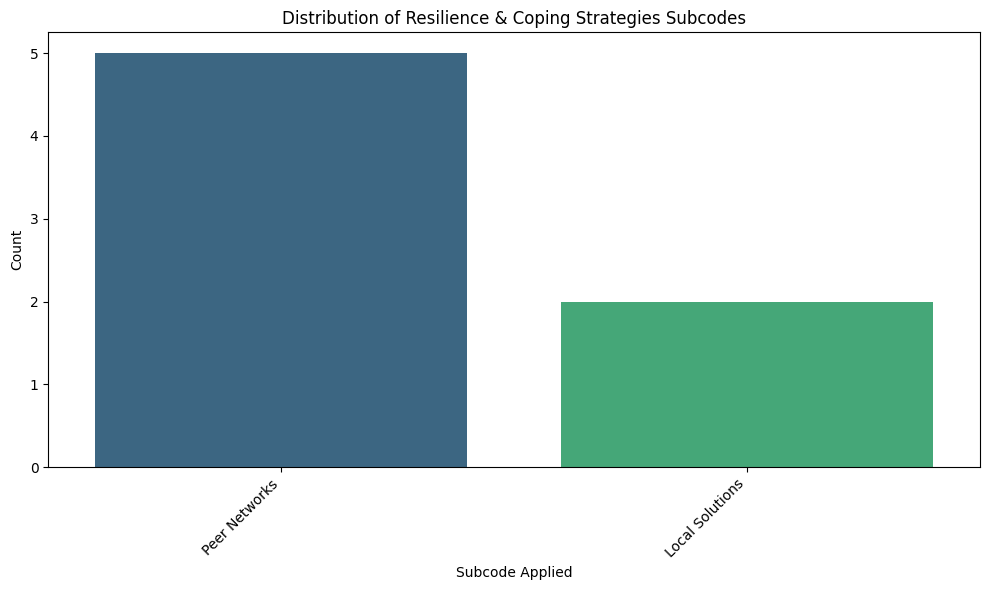

In [248]:
# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=resilience_subcode_counts.index,
    y=resilience_subcode_counts.values,
    palette="viridis",
    hue=resilience_subcode_counts.index,
    legend=False,
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Subcode Applied")
plt.ylabel("Count")
plt.title("Distribution of Resilience & Coping Strategies Subcodes")
plt.tight_layout()

# Save to a file
plt.savefig("resilience_subcodes_distribution.png", bbox_inches="tight")

plt.show()

### Summary: Resilience & Coping Strategies

* The analysis for 'Resilience & Coping Strategies' identified counts for subcodes such as 'Peer Networks' and 'Local Solutions'. The subcode 'Creative Adaptation' did not appear in the dataset under this category.

* The visualization shows that 'Peer Networks' is the most frequent subcode within this category, followed by 'Local Solutions'.

* The absence of 'Creative Adaptation' might suggest that this aspect of resilience and coping is not as prevalent in the dataset or is coded under different categories.

## Co-occurring codes

### Identify co-occuring codes

In [249]:
# Filter for multiple codes
df_multiple_codes = df[df["Code(s) Applied"].str.contains(";", na=False)].copy()

# Get unique code combinations
code_lists = [
    sorted([code.strip() for code in codes.split(";")])
    for codes in df_multiple_codes["Code(s) Applied"].unique()
]

# Generate co-occurring code pairs
co_occurring_code_pairs = set()
for code_list in code_lists:
    for pair in combinations(code_list, 2):
        co_occurring_code_pairs.add(pair)

# Display unique pairs
display(list(co_occurring_code_pairs))

[('Digital Technology & Design', 'Resilience & Coping Strategies'),
 ('Digital Technology & Design', 'Inclusive Digital Ecosystem'),
 ('Inclusive Digital Ecosystem', 'Resilience & Coping Strategies'),
 ('Access Barriers', 'Digital Skills Gap'),
 ('Access Barriers', 'Digital Technology & Design'),
 ('Digital Skills Gap', 'Social & Systemic Exclusion'),
 ('Access Barriers', 'Social & Systemic Exclusion')]

### Count co-occurring codes
Count the occurrences of each code pair that appear together in the same original row.


In [250]:
# Split and sort codes
code_lists_filtered = df_multiple_codes["Code(s) Applied"].apply(
    lambda x: sorted([code.strip() for code in x.split(";")])
)

# Generate code pair combinations
code_pair_combinations = code_lists_filtered.apply(lambda x: list(combinations(x, 2)))

# Flatten list of pairs
all_co_occurring_pairs = [
    pair for sublist in code_pair_combinations for pair in sublist
]

# Create Series from pairs
co_occurrence_series = pd.Series(all_co_occurring_pairs)

# Count co-occurrences
co_occurrence_counts = co_occurrence_series.value_counts()

# Display counts
display(co_occurrence_counts)

,count
"(Access Barriers, Social & Systemic Exclusion)",17
"(Access Barriers, Digital Skills Gap)",8
"(Access Barriers, Digital Technology & Design)",8
"(Digital Technology & Design, Inclusive Digital Ecosystem)",4
"(Digital Skills Gap, Social & Systemic Exclusion)",3
"(Inclusive Digital Ecosystem, Resilience & Coping Strategies)",2
"(Digital Technology & Design, Resilience & Coping Strategies)",1


### Visualize co-occurring codes


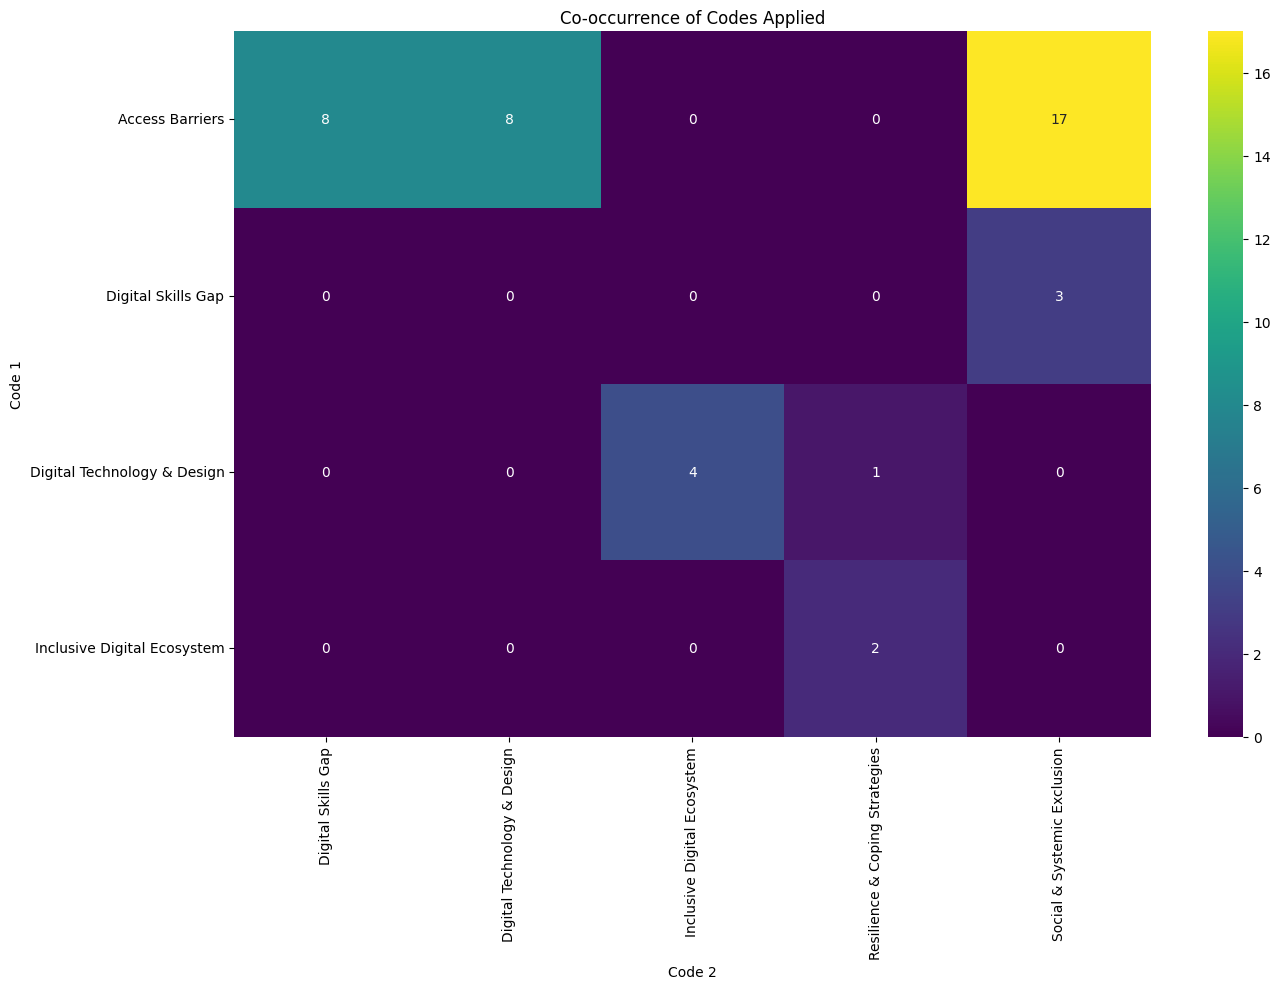

In [251]:
# Convert index to MultiIndex
co_occurrence_counts.index = pd.MultiIndex.from_tuples(co_occurrence_counts.index)

# Convert counts to DataFrame for heatmap
co_occurrence_matrix = co_occurrence_counts.unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(14, 10))  # Increased figure width
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Code 2")
plt.ylabel("Code 1")
plt.title("Co-occurrence of Codes Applied")
plt.yticks(rotation=0)  # Rotate y-axis labels to be horizontal
plt.tight_layout()

# Save to a file
plt.savefig("co_occurrence_heatmap.png", bbox_inches="tight")

plt.show()

### Summary: Co-occuring Codes


*   The most frequent co-occurring code pair is '(Access Barriers, Social & Systemic Exclusion)', appearing 17 times in the dataset.

*   Other frequently co-occurring pairs include '(Mental Health, Stress)', '(Mental Health, Health Barriers)', and '(Access Barriers, Health Barriers)'.

*   The high frequency of co-occurrence between "Access Barriers" and "Social & Systemic Exclusion" suggests a strong relationship between these two factors.

*   Analyzing the content of the rows where frequently co-occurring code pairs appear could provide qualitative context to the quantitative co-occurrence counts. This could help understand *why* these codes tend to appear together.
